# Haar Wavelet


In [114]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
import math
import IPython.display

In [106]:
image = cv2.imread('/home/juanca632/PersonalProjects/stage/wavelet-transform/image_gray.jpg', cv2.IMREAD_GRAYSCALE)

In [107]:
root2 = math.sqrt(2)

# Decomposition


/tmp/ipykernel_332/2427763125.py:13: RuntimeWarning: overflow encountered in scalar subtract
  dif = (matrix[i, j] - matrix[i, j+1]) / root2
/tmp/ipykernel_332/2427763125.py:12: RuntimeWarning: overflow encountered in scalar add
  sum = (matrix[i, j] + matrix[i, j+1]) / root2


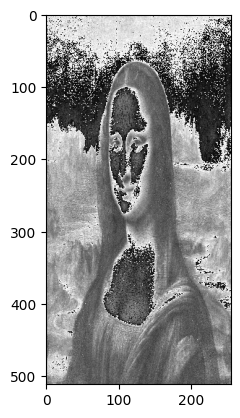

[[255 255 255 255]
 [255   6   7   8]
 [255  10  11  12]
 [255  14  15  16]]


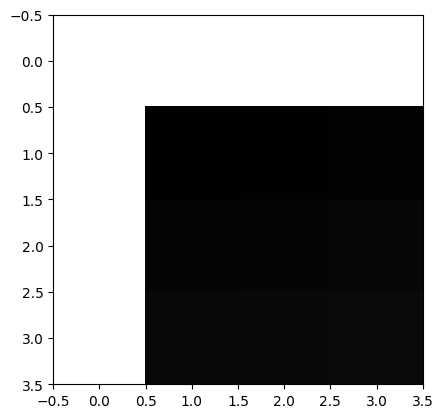

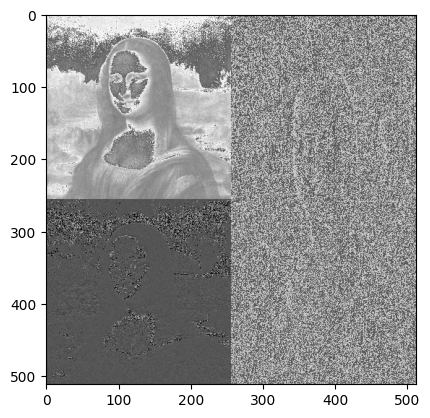

In [108]:
def haar_wavelet_transform(matrix):
    n = int(matrix.shape[0])
    n_half = int(n /2)
    transformed_matrix = np.zeros((n,n))

    if(n >= 2):
        for i in range(0, n):
            aux = 0
            aux2 = int(n_half + aux)
            for j in range(0, n, 2):

                sum = (matrix[i, j] + matrix[i, j+1]) / root2
                dif = (matrix[i, j] - matrix[i, j+1]) / root2
                transformed_matrix[i,aux] = sum
                transformed_matrix[i,aux2] = dif
                aux = aux + 1
                aux2 = aux2 + 1
        submatrix = transformed_matrix[:, :n//2]  
        min_value = np.min(submatrix)
        max_value = np.max(submatrix)   
        plt.imshow(submatrix,  cmap="gray")
        plt.show() 
        for i in range(len(matrix_test)):
            for j in range(len(matrix_test)):
                # submatrix[i][j] = (submatrix[i][j] - min_value) * 255 / (max_value - min_value)
                matrix_test[0][j] = 255
                matrix_test[i][0] = 255
        

        print(matrix_test)

        plt.imshow(matrix_test,  cmap="gray")
        plt.show()


        transformed_matrix2 = np.copy(transformed_matrix)
        for j in range(0, n_half):
            aux = 0
            aux2 = int(n_half + aux)
            for i in range(0, n, 2):

                sum = (transformed_matrix[i, j] + transformed_matrix[i+1, j]) / root2
                dif = (transformed_matrix[i, j] - transformed_matrix[i+1, j]) / root2

                transformed_matrix2[aux,j] = sum
                transformed_matrix2[aux2,j] = dif
                aux = aux + 1
                aux2 = aux2 + 1

        transformed_matrix3 = transformed_matrix2[:n_half,:n_half]

    return transformed_matrix2, transformed_matrix3

# Ejemplo de matriz 4x4
matrix_test = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12],
                   [13, 14, 15, 16]])

image_result, image_aprox = haar_wavelet_transform(image)

print("\n")
# print(image_result)
plt.imshow(image_result,  cmap="gray")
plt.show()



# Reconstruction

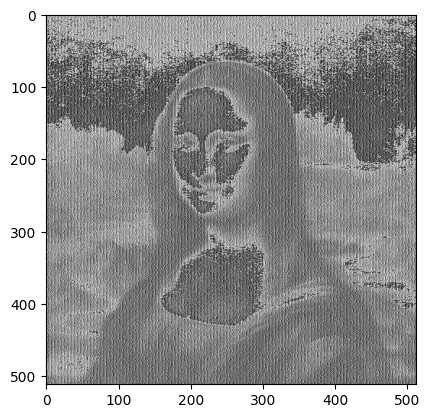

In [109]:
def inverse_haar_wavelet_transform(transformed_matrix):
    n = transformed_matrix.shape[0]
    n_half = n // 2
    reconstructed_matrix = np.copy(transformed_matrix)

    if n >= 2:
        # Reconstrucción vertical
        for j in range(n_half):
            aux = 0
            aux2 = n_half + aux
            for i in range(0, n, 2):
                s = transformed_matrix[aux, j]
                d = transformed_matrix[aux2, j]
                reconstructed_matrix[i, j] = s + d
                reconstructed_matrix[i + 1, j] = s - d
                aux += 1
                aux2 += 1

        # Reconstrucción horizontal
        reconstructed_matrix2 = np.zeros_like(reconstructed_matrix)
        for i in range(n):
            aux = 0
            aux2 = n_half + aux
            for j in range(0, n, 2):
                s = reconstructed_matrix[i, aux]
                d = reconstructed_matrix[i, aux2]
                reconstructed_matrix2[i, j] = s + d
                reconstructed_matrix2[i, j + 1] = s - d
                aux += 1
                aux2 += 1
        return reconstructed_matrix2

    return transformed_matrix

# Ejemplo de matriz transformada
transformed_matrix = np.array([[6, -2, 0, 0],
                               [5, -1, 1, 0],
                               [2, 0, -2, 0],
                               [1, 1, 1, -3]])

image_original = inverse_haar_wavelet_transform(image_result)

print("\n")
# print(image_original)
plt.imshow(image_original,  cmap="gray")
plt.show()


# Comparison

Text(0.5, 1.0, 'Reconstruida')

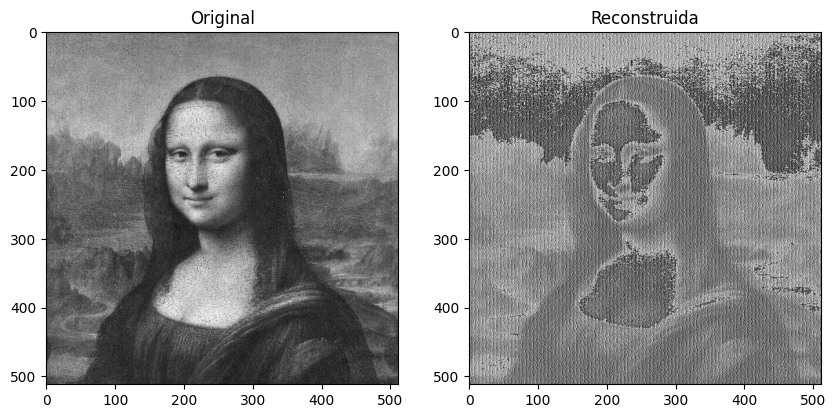

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(image_original, cmap='gray')
axes[1].set_title('Reconstruida')

In [111]:
print(image)
print("\n")
print(image_original)

[[108 118 116 ... 110 119 108]
 [123 111 120 ... 104 108 111]
 [117 138 122 ... 113 131 105]
 ...
 [ 64  79  68 ...  76  55  53]
 [ 57  62  59 ...  56  54  77]
 [ 67  54  60 ...  80  58  73]]


[[399.94826817  52.05173183 231.41421356 ... 222.05025253 234.77817459
  219.22182541]
 [242.48528137 225.51471863 422.19090886 ... 213.27207794 397.89801564
   40.10198436]
 [421.17009358  88.82990642 241.65685425 ... 228.05025253 254.38477631
  217.61522369]
 ...
 [313.41273427 -27.41273427 133.65685425 ... -32.24116139 109.41421356
  106.58578644]
 [296.48380208 -58.48380208 116.24264069 ... -70.19090886 295.75588002
  -33.75588002]
 [130.19238816 111.80761184 117.65685425 ... -31.27059864 301.41273427
  -39.41273427]]


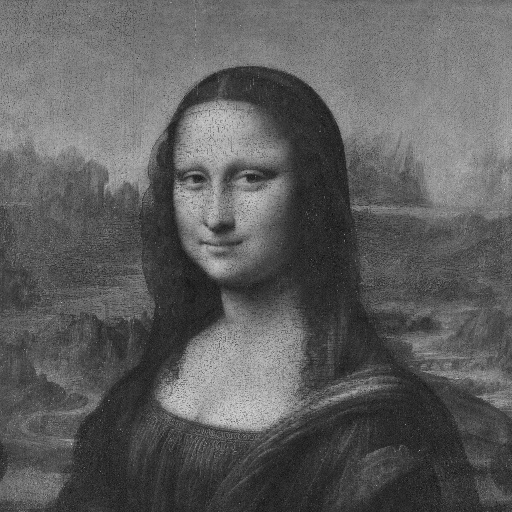

In [117]:
def imshow(image):
    _,ret = cv2.imencode('.jpg', image) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

imshow(image)